##### **Linear Regression**

##### **Experiment no. 1:**
 - **Implement Simple Linear Regression and Multiple Linear Regression models. Select appropriate data set for your experiment and draw graphs.**

##### ***Simple Linear Regression Model***
 - with only **one independent(X)** and **one dependent(Y)** variable
 - the model estimates the **Slope** and **intercept** of the line of best fit, which represents the relationship between the variables
 - it shows the linear relationship between the `independent variable(predictor)` i.e. `X-axis` and `dependent variable(output)` i.e. `Y-axis`.

 1. **Slope** - represents the `change` in the `dependent varibale` for `each unit change` in `idependent variable`.
 2. **Intercept** - represents the `predicted value` of the `dependent variable` when the `independent variable` is `zero`.

 - Mathematically,

    ***y = mx + c***

    where:
    - \( ***y*** \) is the dependent variable (the variable we want to predict),
    - \( ***x*** \) is the independent variable (the variable used for prediction),
    - \( ***m*** \) is the slope of the regression line, representing the change in \( ***y*** \) for a unit change in \( ***x*** \),
    - \( ***c*** \) is the y-intercept, the value of \( ***y*** \) when \( ***x*** \) is ***0***.


##### ***Let's start by implementing a simple scatter plot using matplotlib***

In [362]:
# importing the required library
import matplotlib.pyplot as plt
import numpy as np

In [363]:
# generating random data using numpy
# np.random.seed(42) # random seed for reproducibility
# Generating 100 random values between 0 and 1
X = 1*np.random.rand(100,1)
#Generating corresponding Y-values with some random noise
y = 4+3*X + np.random.rand(100,1) #here 4+3x is a linear equation

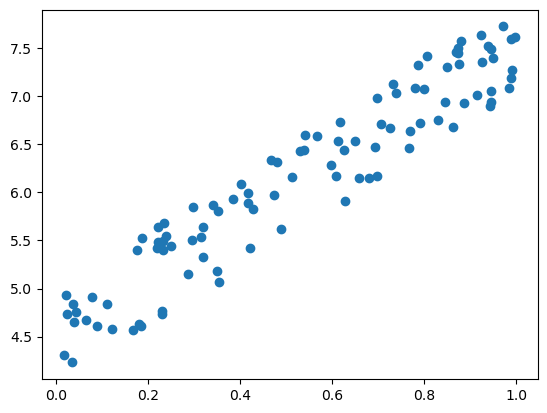

In [364]:
# plot the data on the graph
plt.scatter(x=X,y=y)
plt.show()

##### ***Let's Draw regression line using Scipy library***

In [365]:
from scipy import stats

In [366]:
# slice the data points
x_points = X[:,0]
y_points = y[:,0]

In [367]:
model = stats.linregress(x_points,y_points)

In [368]:
dir(model)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__getnewargs_ex__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_asdict',
 '_extra_fields',
 '_fields',
 'count',
 'index',
 'intercept',
 'intercept_stderr',
 'pvalue',
 'rvalue',
 'slope',
 'stderr']

In [369]:
# some important values of linear regression model
# 1. Slope - represents the change in the dependent varibale for each unit change in idependent variable.
# 2. Intercept - represents the predicted value of the dependent variable when the independent variable is zero.
# 3. rvalue - coef of correlation of x-axis & y-axis - ranges from -1 to 1, where 0 means no relationship, and 1&-1 means 100% related
# 4. stderr -   measures the precision of the estimates of the slope. lower means good
# 5. intercept_stderr - measure the precision of the estimate of the intercept. lower means good
slope = model.slope
intercept = model.intercept
rvalue = model.rvalue
stderr = model.stderr
intercept_stderr = model.intercept_stderr
print("Slope Value: {}".format(slope))
print("Intercept Value: {}".format(intercept))
print("STD ERR: {}".format(stderr))
print("r_value: {}".format(stderr))

Slope Value: 2.9641620349505136
Intercept Value: 4.5730872608064725
STD ERR: 0.09820823494445836
r_value: 0.09820823494445836


In [370]:
# now using slope and intercept make a regression function as
def reg_func(independent_pts):
    return slope*independent_pts+intercept

In [371]:
new_pts = []
# run each value of x_points through the function to generate new data points
for x in x_points:
    new_pts.append(reg_func(independent_pts=x))

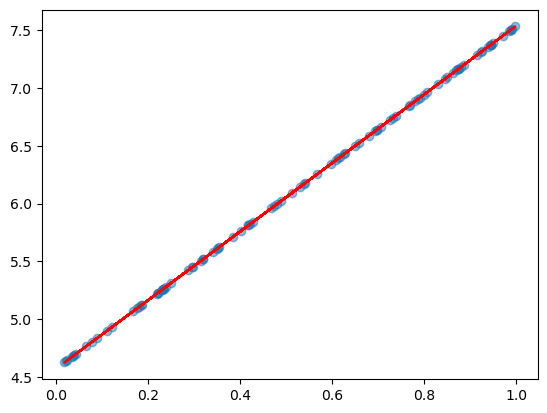

In [372]:
# draw scatter plot
plt.scatter(x_points,new_pts,alpha=0.5,label='Data')
# to show red best fit line
plt.plot(x_points,new_pts,color='red',label='Best-Fit line')
plt.show()

In [373]:
# let's predict some thing
prediction = reg_func(0.2)
prediction

5.165919667796575

##### **Linear Regression using SkLearn**

In [374]:
from sklearn.linear_model import LinearRegression

In [375]:
# create regression model
model = LinearRegression()

In [376]:
# fit the model to the data
model.fit(X,y)

LinearRegression()

In [377]:
# get slope and intercept
slope = model.coef_[0][0]
intercept = model.intercept_[0]
# rvalue = model.score
# stderr = model.rank_
print("Slope value: {}".format(slope))
print("Intercept value: {}".format(intercept))

Slope value: 2.9641620349505127
Intercept value: 4.5730872608064725


In [378]:
# now using slope and intercept make a regression function as
def reg_func(independent_pts):
    return slope*independent_pts+intercept

In [379]:
new_pts = []
# run each value of x_points through the function to generate new data points
for x in x_points:
    new_pts.append(reg_func(independent_pts=x))

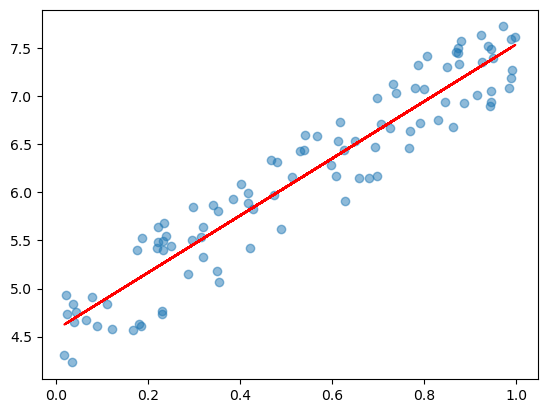

In [380]:
plt.scatter(X,y,alpha=0.5,label='Data')
plt.plot(X,new_pts,color='red')
plt.show()

In [381]:
df = np.array([[0.2]])
pred =  model.predict(df)
print(pred[0][0])

5.165919667796575
